Dataset loaded with 98 records.
Dataset columns: Index(['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'], dtype='object')
Updated columns after splitting: Index(['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location',
       'Confidence Score'],
      dtype='object')
Dataset after dropping missing values: 96 records.
Text cleaning completed.
Data split into train and test sets. Training on 76 samples.
Model training completed.
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

    Negative       0.62      1.00      0.77         5
    Positive       1.00      0.80      0.89        15

    accuracy                           0.85        20
   macro avg       0.81      0.90      0.83        20
weighted avg       0.91      0.85      0.86        20



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/varikuntlasaimanoj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/varikuntlasaimanoj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


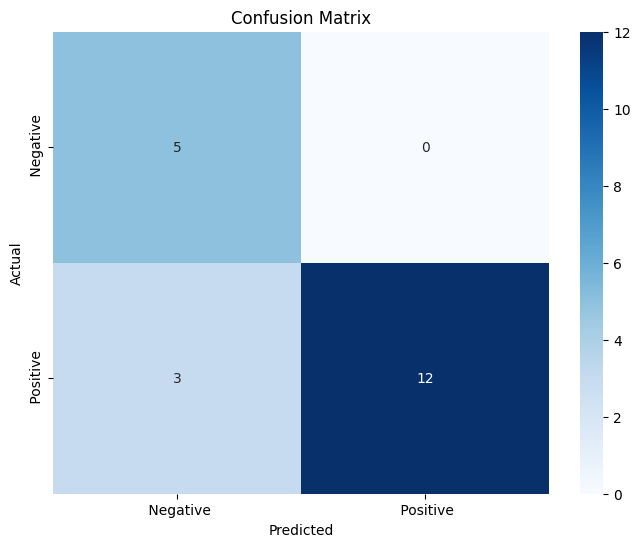

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Step 1: Load the dataset with the correct delimiter
df = pd.read_csv('sentiment-analysis.csv', delimiter=',')
print(f"Dataset loaded with {len(df)} records.")
print("Dataset columns:", df.columns)

# Step 2: Split combined column if necessary
if len(df.columns) == 1:
    df = df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].str.split(',', expand=True)
    df.columns = ['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score']

print("Updated columns after splitting:", df.columns)

# Step 3: Handle Missing Values in Target Column
# Drop rows where Sentiment (target column) is NaN
df = df.dropna(subset=['Sentiment'])
print(f"Dataset after dropping missing values: {len(df)} records.")

# Step 4: Data Cleaning
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text)) 
    text = text.lower()  # Convert to lowercase
    words = [word for word in text.split() if word not in stop_words] 
    words = [lemmatizer.lemmatize(word) for word in words] 
    return ' '.join(words)

df['cleaned_text'] = df['Text'].apply(clean_text)
print("Text cleaning completed.")

# Step 5: Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['Sentiment']  

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into train and test sets. Training on {len(X_train)} samples.")

# Step 7: Model Selection and Training
model = LogisticRegression()
model.fit(X_train, y_train)
print("Model training completed.")

# Step 8: Model Evaluation
y_pred = model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()